# Import the data

## List of imports

In [ ]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Gather the data

In [ ]:
api = wandb.Api()# used to import weight and bias pipeline

In [ ]:
runs_loss = api.runs("mhaggag96/trends_project",{"tags":"autonovel_unbalanced"})# this returned all the runs that has the tag loss experiment

In [ ]:
runs_loss[0], runs_loss[1], runs_loss[2]

(<Run mhaggag96/trends_project/my279rcp (finished)>,
 <Run mhaggag96/trends_project/b9j568h7 (finished)>,
 <Run mhaggag96/trends_project/23ihb9aa (finished)>)

In [ ]:
runs_loss[0]

<Run mhaggag96/trends_project/my279rcp (finished)>

In [ ]:
run_names=['10%_unlabeled','10%_labeled','baseline']# it returns the runs from the news to the oldest. I had weight and bias in another tab to make sure that we are folllowing this order
data_df = []
for run in runs_loss:
  data_df.append(run.history())
test_dict = dict(zip(run_names, data_df)) 

In [ ]:
data_df

[     ari_Head_2  ari_Head_1  cluster_acc_Head_1  _step  Cross_entropy_loss  \
 0      0.333822    0.812966              0.9204      0            0.165102   
 1      0.337507    0.852330              0.9378      1            0.138799   
 2      0.450643    0.848768              0.9362      2            0.121157   
 3      0.518153    0.850139              0.9368      3            0.114851   
 4      0.496753    0.855416              0.9392      4            0.102629   
 ..          ...         ...                 ...    ...                 ...   
 195    0.504212    0.891636              0.9550    195            0.002331   
 196    0.537350    0.893088              0.9556    196            0.002041   
 197    0.563468    0.895425              0.9566    197            0.002488   
 198    0.528276    0.888914              0.9538    198            0.002236   
 199    0.509821    0.893016              0.9556    199            0.001574   
 
      nmi_Head_2     _runtime    lr  epoch  nmi_He

In [ ]:
test_dict.keys()

dict_keys(['10%_unlabeled', '10%_labeled', 'baseline'])

In [ ]:
test_dict['10%_unlabeled']

,ari_Head_2,ari_Head_1,cluster_acc_Head_1,_step,Cross_entropy_loss,nmi_Head_2,_runtime,lr,epoch,nmi_Head_1,Consistency_loss_total,testing_acc_Head_1,Total_average_loss,Binary_cross_entropy_loss,cluster_acc_Head_2,Consistency_loss_part_a,Consistency_loss_part_b,_timestamp,Head_1_training_accuracy
0,0.333822,0.812966,0.9204,0,0.165102,0.414157,55.347285,0.10,0,0.785697,0.012729,92.04,0.495667,0.330137,0.5208,0.010253,0.002476,1.671484e+09,93.991104
1,0.337507,0.852330,0.9378,1,0.138799,0.400782,87.364033,0.10,1,0.819172,0.014832,93.78,0.453636,0.314229,0.5580,0.009225,0.005607,1.671484e+09,94.881812
2,0.450643,0.848768,0.9362,2,0.121157,0.478808,119.490366,0.10,2,0.815430,0.014773,93.62,0.427691,0.305798,0.7276,0.009180,0.005594,1.671484e+09,95.712433
3,0.518153,0.850139,0.9368,3,0.114851,0.546069,151.331799,0.10,3,0.816664,0.013981,93.68,0.424883,0.309190,0.7572,0.009048,0.004934,1.671484e+09,95.858710
4,0.496753,0.855416,0.9392,4,0.102629,0.527687,183.205233,0.10,4,0.820817,0.013853,93.92,0.407021,0.303386,0.7468,0.009313,0.004540,1.671484e+09,96.278115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.504212,0.891636,0.9550,195,0.002331,0.613065,6360.997796,0.01,195,0.860770,0.002196,95.50,0.241812,0.228499,0.7100,0.000609,0.001587,1.671490e+09,99.944450
196,0.537350,0.893088,0.9556,196,0.002041,0.621315,6393.392948,0.01,196,0.862168,0.002172,95.56,0.245697,0.232797,0.7192,0.000577,0.001594,1.671490e+09,99.972164
197,0.563468,0.895425,0.9566,197,0.002488,0.643479,6425.658441,0.01,197,0.864406,0.002332,95.66,0.243677,0.229532,0.7372,0.000680,0.001652,1.671490e+09,99.952144
198,0.528276,0.888914,0.9538,198,0.002236,0.620809,6457.952298,0.01,198,0.858067,0.002051,95.38,0.232479,0.219987,0.7232,0.000605,0.001446,1.671490e+09,99.943884


# Plot the data

## Head1 metrics

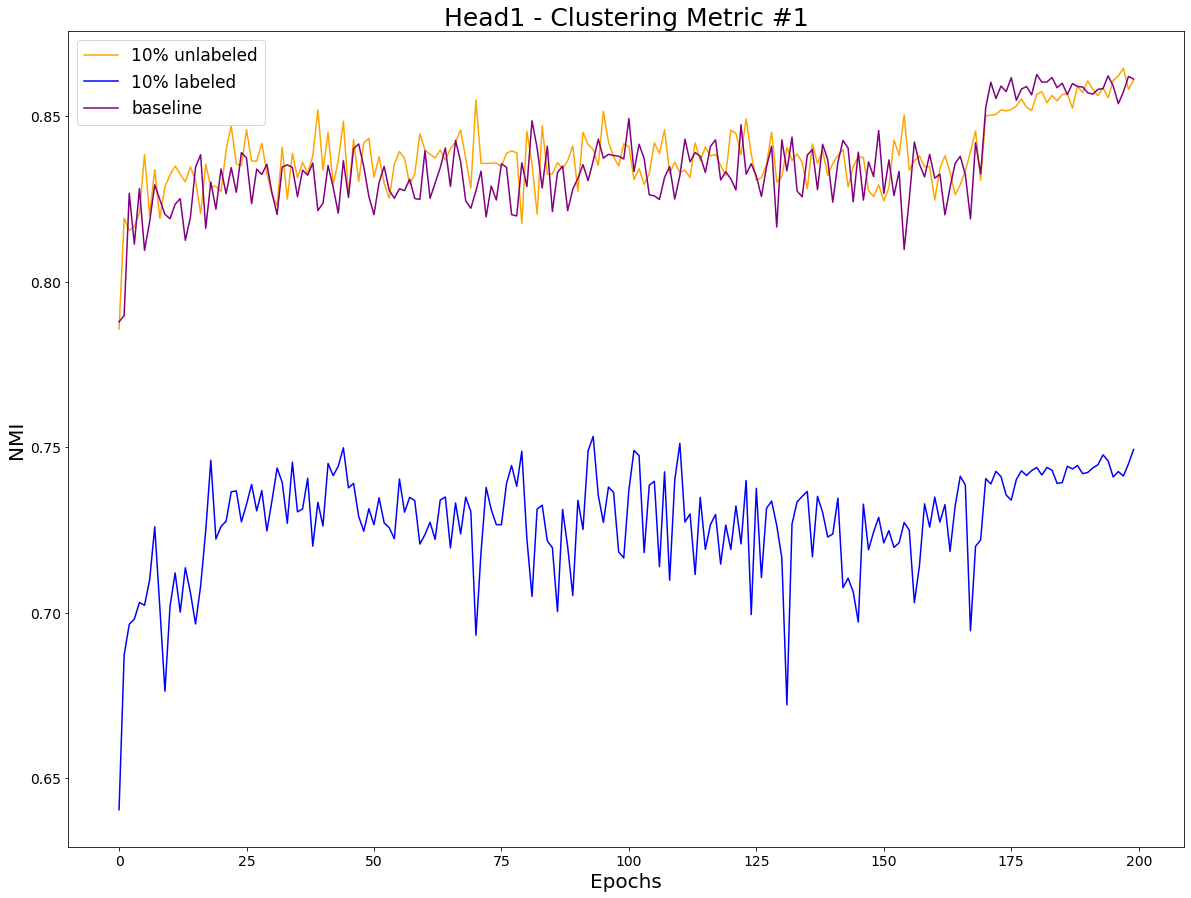

In [ ]:
# NMI
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].nmi_Head_1.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].nmi_Head_1.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].nmi_Head_1.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('NMI',fontsize=20);
ax.set_title('Head1 - Clustering Metric #1',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

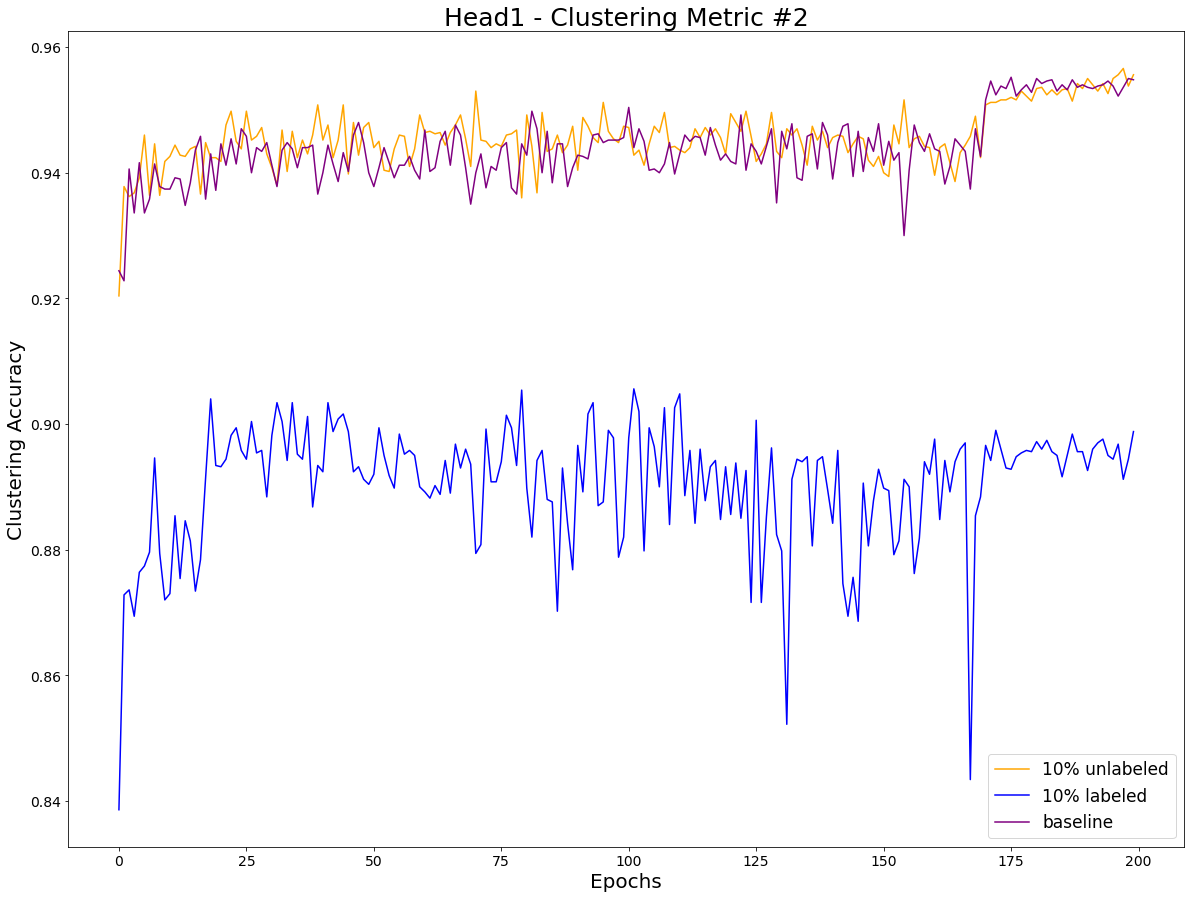

In [ ]:
# CLUSTER ACC
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].cluster_acc_Head_1.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].cluster_acc_Head_1.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].cluster_acc_Head_1.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Clustering Accuracy',fontsize=20);
ax.set_title('Head1 - Clustering Metric #2',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

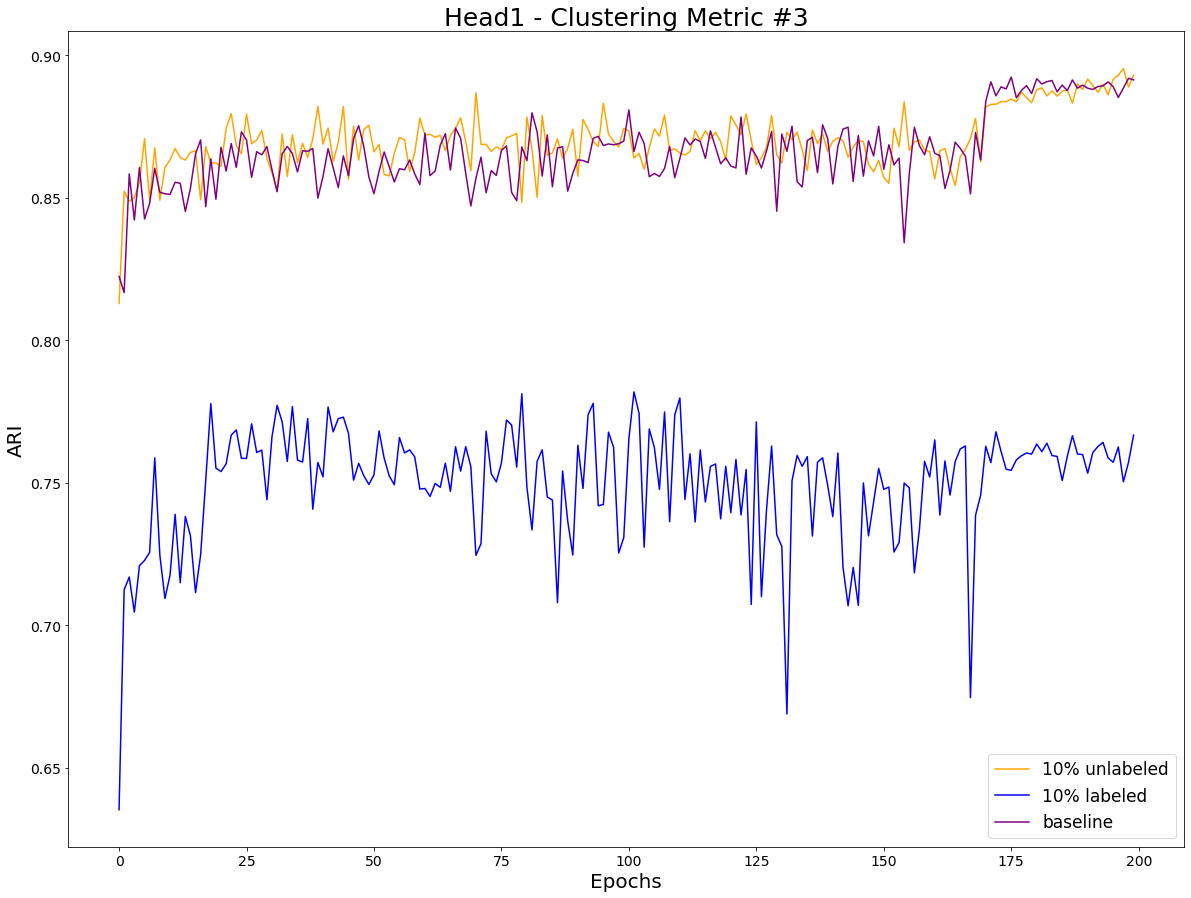

In [ ]:
# ARI
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].ari_Head_1.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].ari_Head_1.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].ari_Head_1.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('ARI',fontsize=20);
ax.set_title('Head1 - Clustering Metric #3',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

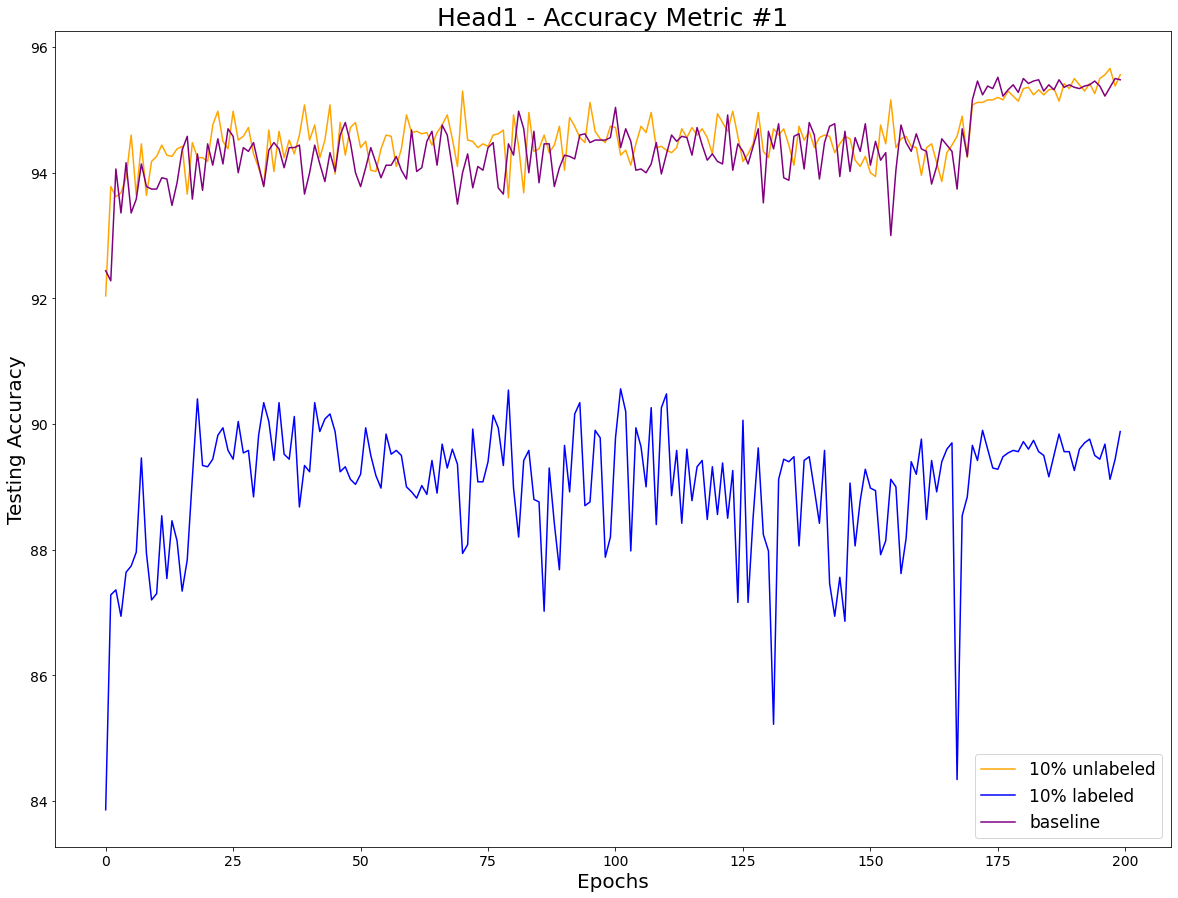

In [ ]:
# TESTING ACC ACC
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].testing_acc_Head_1.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].testing_acc_Head_1.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].testing_acc_Head_1.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Testing Accuracy',fontsize=20);
ax.set_title('Head1 - Accuracy Metric #1',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

## Head2 metrics

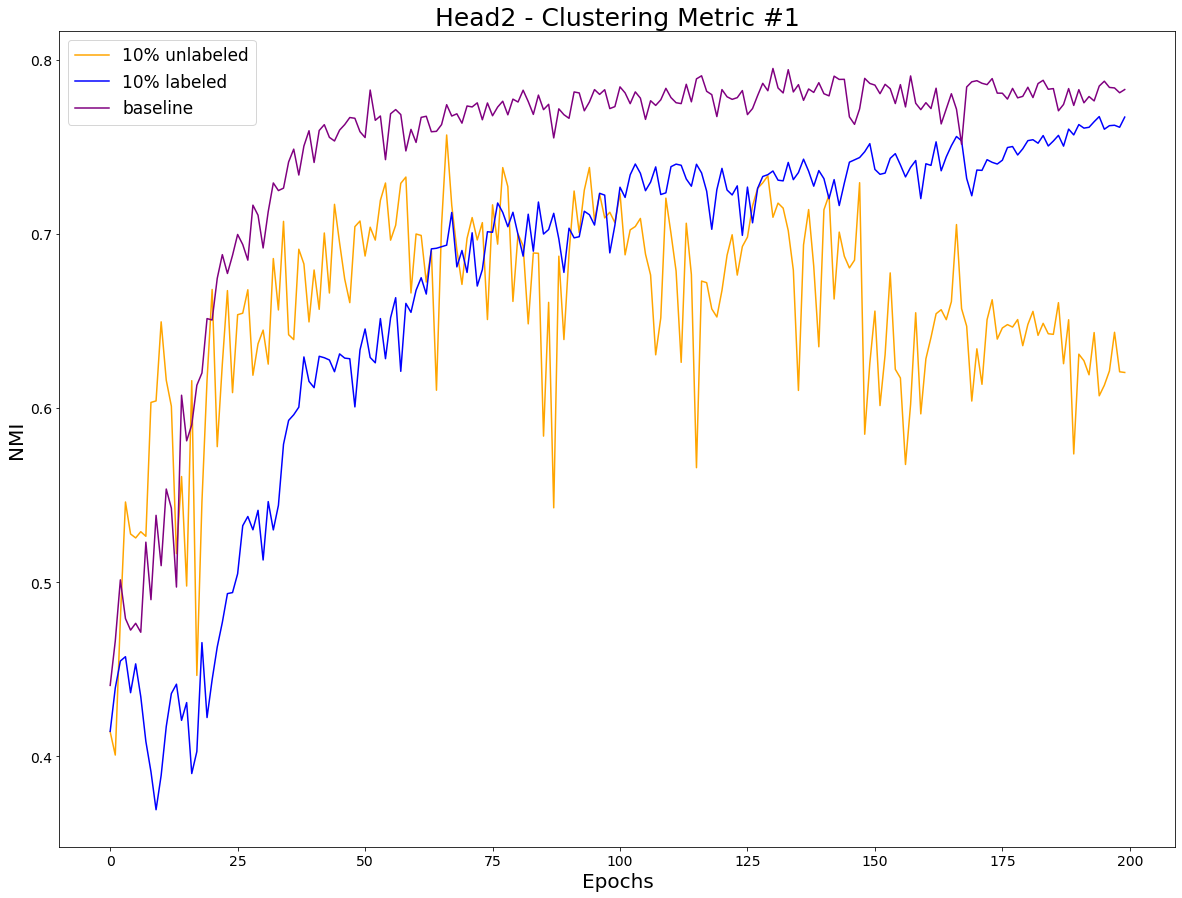

In [ ]:
# NMI
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].nmi_Head_2.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].nmi_Head_2.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].nmi_Head_2.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('NMI',fontsize=20);
ax.set_title('Head2 - Clustering Metric #1',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

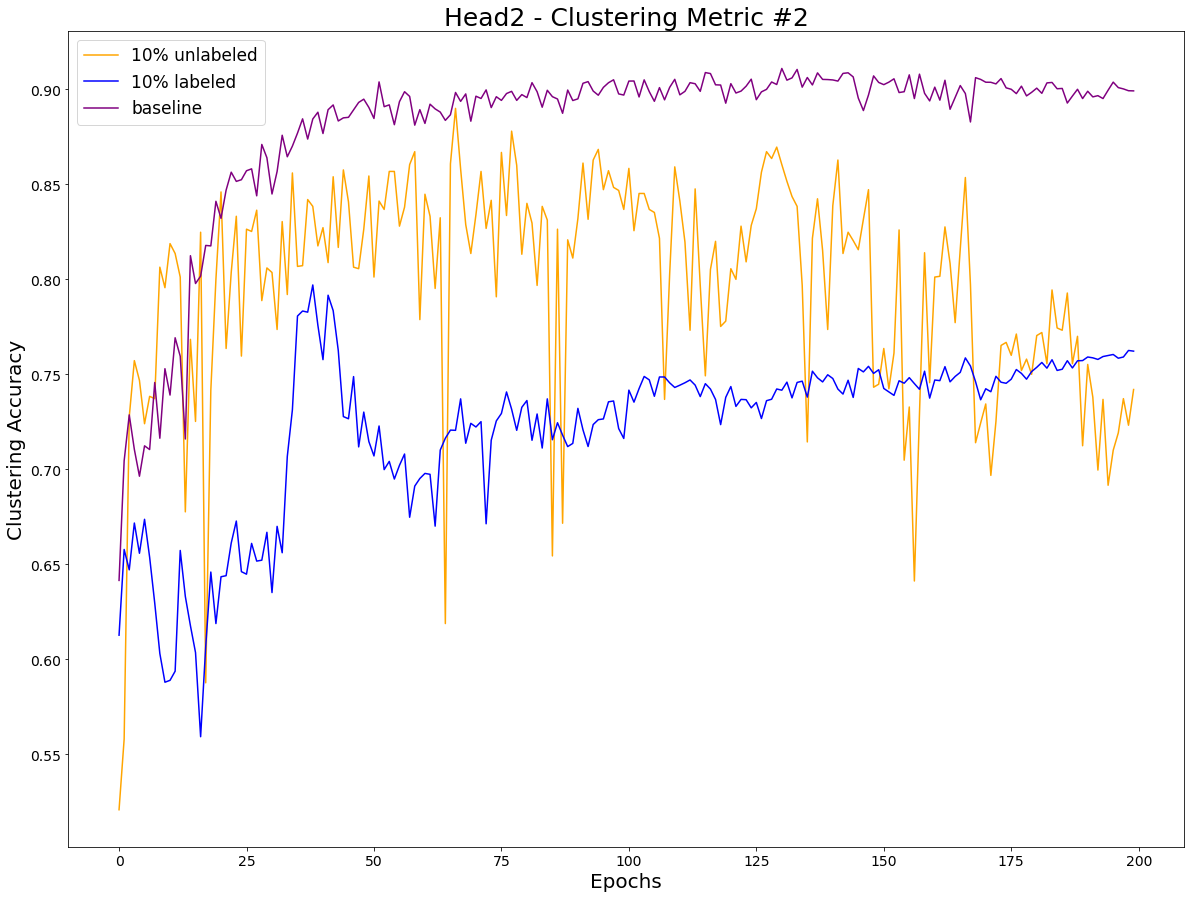

In [ ]:
# CLUSTER ACC
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].cluster_acc_Head_2.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].cluster_acc_Head_2.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].cluster_acc_Head_2.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('Clustering Accuracy',fontsize=20);
ax.set_title('Head2 - Clustering Metric #2',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()

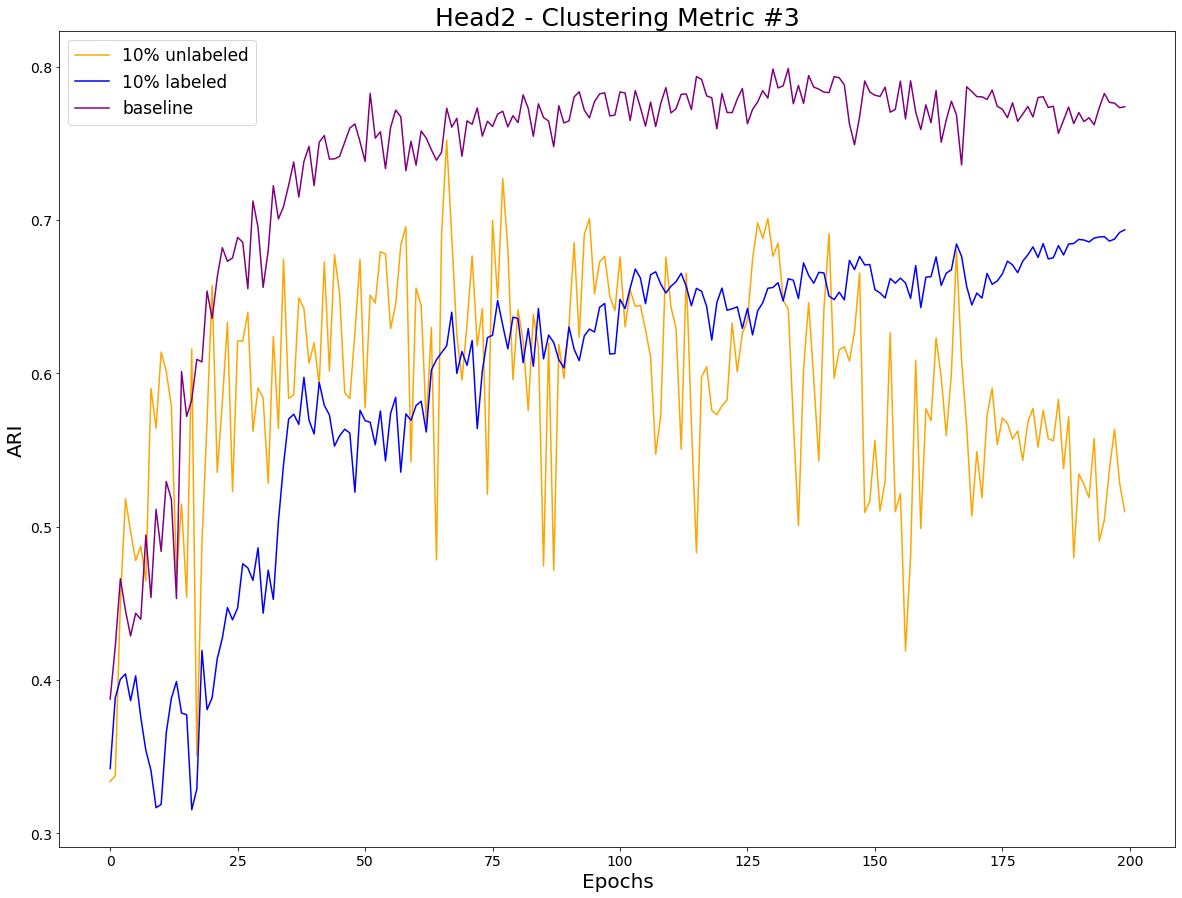

In [ ]:
# ARI
fig, ax= plt.subplots(figsize=(20, 15), facecolor='white');
ax.plot(test_dict['10%_unlabeled'].ari_Head_2.tolist(), color='orange',label="10% unlabeled") ;
ax.plot(test_dict['10%_labeled'].ari_Head_2.tolist(), color='blue',label="10% labeled") ;
ax.plot(test_dict['baseline'].ari_Head_2.tolist(), color='purple',label="baseline") ;
ax.set_xlabel('Epochs',fontsize=20);
ax.set_ylabel('ARI',fontsize=20);
ax.set_title('Head2 - Clustering Metric #3',fontsize=25);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', framealpha=0.8,fontsize=17)
plt.show()